In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
import seaborn as sn

# hierarchical clustering

In [135]:
df=pd.read_csv(r'C:\Users\anike\Downloads\crime_data.csv') # reading the file

In [136]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [137]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x # creating normalization function

In [138]:
df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [139]:
df_norm = norm_func(df.iloc[:,1:]) # selecting all the columns expect unnamed and applying normalization

In [140]:
df_norm # data after applying normalization

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


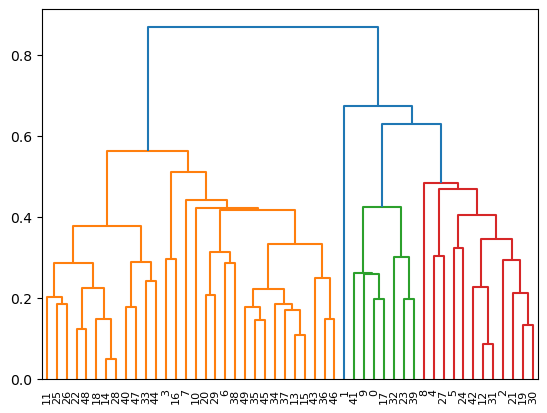

In [141]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average')) # dendogram for the data

In [142]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average') # using the aggloemerative clustring model

In [143]:
hc.fit(df_norm) # training the data

AgglomerativeClustering(linkage='average', n_clusters=5)

In [144]:
y_hc = hc.fit_predict(df_norm) # predicting clusters  for the data

In [145]:
y_hc

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [146]:
df['clusterid']=y_hc

In [147]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [148]:
df.groupby(['clusterid'])['Unnamed: 0'] # grouping the columns in main data df

In [149]:
df.groupby(["clusterid"])["Unnamed: 0"].apply(lambda x:tuple(x)) # grouping the columns and applying tuple 

clusterid
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Arizona, California, Colorado, Florida, Illin...
2                                            (Alaska,)
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
Name: Unnamed: 0, dtype: object

In [150]:
df[df['clusterid']==1] 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [151]:
df[df['clusterid']==0] 

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [ ]:
# culsterid 1 has higher murder, assault, urbanpop,rape,clusterid as comapared to clusterid 0

# kmean

In [152]:
from sklearn.metrics import silhouette_score # import the silhoutte score

In [153]:
data=pd.read_csv(r'C:\Users\anike\Downloads\crime_data.csv') # reading the file

In [154]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [155]:
da=data.iloc[:,1:]

In [170]:

stscaler = StandardScaler()
df_sca= stscaler.fit_transform(data.iloc[:,1:]) # applying the standard scaler on data for scaling the data
df_sca

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.38760987],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.45502028],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.45502028],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.38760987],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.45502028],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.45502028],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.23024001],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.23024001],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.45502028],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.38760987],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.23024001],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  1.29765042],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.45502028],
       [-0.13637203, -0.70012057, -0.0

In [157]:
df_sca

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [171]:
wcss = [] # within-cluster sum of squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_sca)
    wcss.append(kmeans.inertia_)
    

C:\Users\anike\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


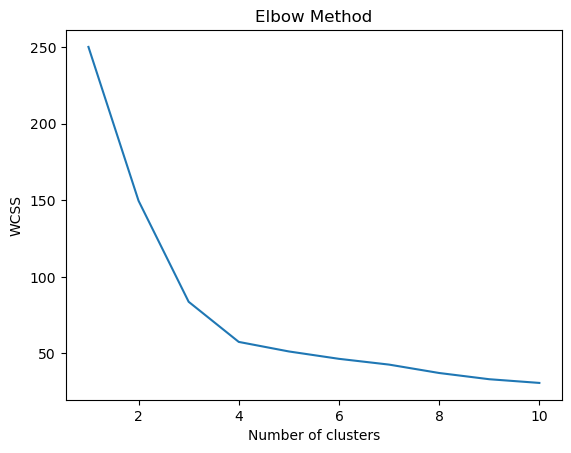

In [172]:
plt.plot(range(1, 11), wcss)
# plotting the elbow plot for getting the number of clusters
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [175]:
clusterer= KMeans(4, random_state=42)
cluster_labels=clusterer.fit_predict(df_sca) # traing the kmean algorithm 

In [162]:
clusters_new

KMeans(n_clusters=4, random_state=42)

In [163]:
pred=clusters_new.predict(df_sca)

In [177]:
pred

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [178]:
silhouette_score(df_sca,cluster_labels) # calculating the silhouette score

0.4828768885493628

In [179]:
data['clusterid']=pred

In [180]:
data.groupby(['clusterid'])['Unnamed: 0'] # grouping the column in main data

In [181]:
data.groupby(["clusterid"])["Unnamed: 0"].apply(lambda x:tuple(x))

clusterid
0    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
1    (Alabama, Arkansas, Georgia, Louisiana, Missis...
2    (Alaska, Arizona, California, Colorado, Florid...
3    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
Name: Unnamed: 0, dtype: object

In [182]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


In [183]:
data[data['clusterid']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [184]:
data[data['clusterid']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [185]:
# clusterid 0 has lower rate of murder assault urbanpop as compared to the clusterid 2

# DBSCAN

In [186]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
df1=pd.read_csv(r'C:\Users\anike\Downloads\crime_data.csv') # importing the libraries and reading the file

In [187]:
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [188]:
df1=df1.iloc[:,1:]

In [189]:
array=df1.values # converting data frame into array
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [190]:
stscaler = StandardScaler()
X = stscaler.fit_transform(array) # applying the standard scaler on data
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [191]:
dbscan = DBSCAN(eps=1, min_samples=4 )
dbscan.fit_predict(X) # traning the dbscan model for the data

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [192]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [193]:
df1['cluster']=dbscan.labels_
df1.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [194]:
df1[df1['cluster']==1]

,Murder,Assault,UrbanPop,Rape,cluster
6,3.3,110,77,11.1,1
11,2.6,120,54,14.2,1
13,7.2,113,65,21.0,1
14,2.2,56,57,11.3,1
15,6.0,115,66,18.0,1
16,9.7,109,52,16.3,1
18,2.1,83,51,7.8,1
20,4.4,149,85,16.3,1
22,2.7,72,66,14.9,1
24,9.0,178,70,28.2,1


In [196]:
# cluster 1 has lesser rate as comapred to cluster 0 and -1

In [197]:
df1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


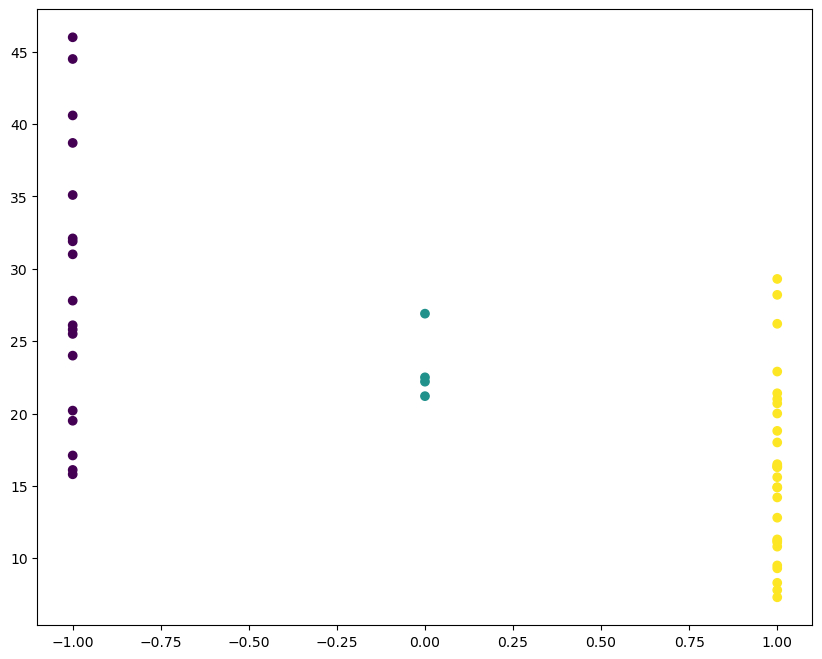

In [198]:
plt.figure(figsize=(10,8))
plt.scatter(df1['cluster'],df1['Rape'],c=dbscan.labels_) # plotting the scatter plot for clusterid and rape column

# 2nd question

# hierarchical clustering

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler # importing the required libraries

In [211]:
DF=pd.read_csv(r'C:\Users\anike\Downloads\EastWestAirlines.csv') # reading the file

In [212]:
DF.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [213]:
DF.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True) # renaming the column as ID and award

In [214]:
DF.set_index('ID',inplace=True)  # set index as ID

In [215]:
DF.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [216]:
DF.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [217]:
DF.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [218]:
DF.corr() # checking the correaltion of the data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


<AxesSubplot:>

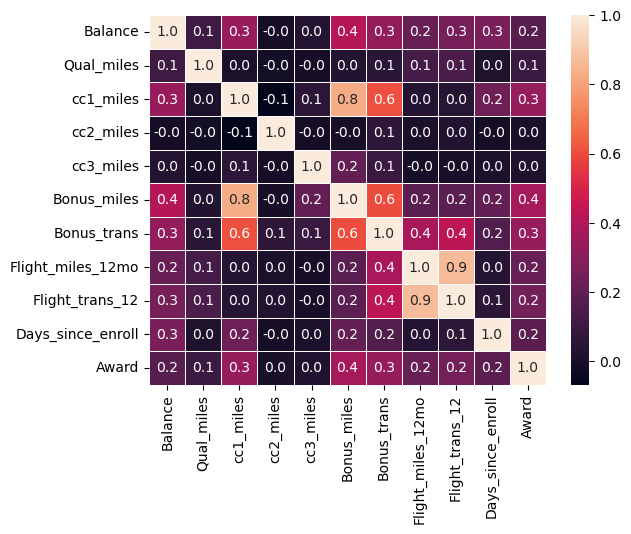

In [37]:
sns.heatmap(DF.corr(),annot=True,linewidths=.5,fmt='.1f') # plotting heat map for corr 

<AxesSubplot:>

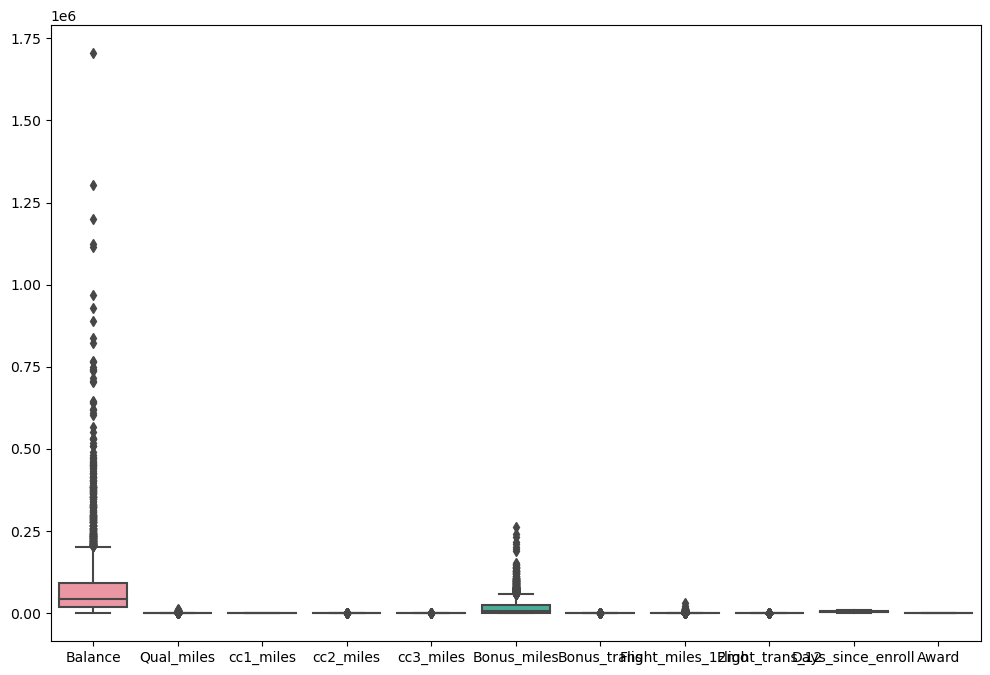

In [220]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=DF) # plotting box plot ofr checking the outlier

<AxesSubplot:>

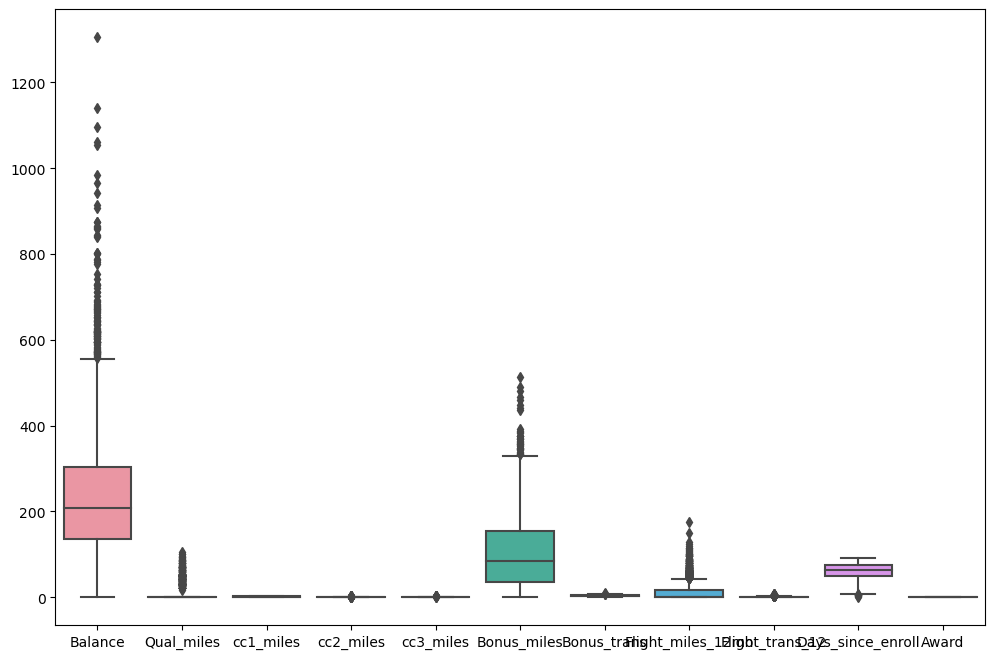

In [221]:
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(DF)) # plotting box plot on data which is transformed using suared root 

In [222]:
DF1=DF.iloc[:,1:]

In [41]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [223]:
DF_norm=norm_func(DF1) # applying the normalixation on the data

In [224]:
DF_norm

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,
1,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
2,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
3,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
4,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
5,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
4017,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
4018,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
4019,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0


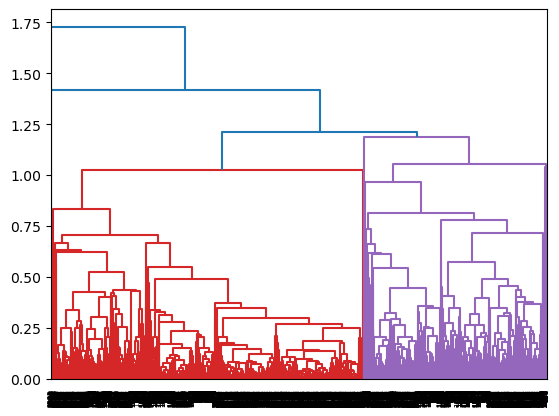

In [225]:
dendrogram=sch.dendrogram(sch.linkage(DF_norm, method='average')) #plotting the dendogram 

In [45]:
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'average')

In [226]:
y_hc = hc.fit_predict(DF_norm) # tarning the agglomerative clustering 

In [227]:
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [228]:
DF['clusterid']=y_hc

In [229]:
DF

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [230]:
DF[DF['clusterid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
4015,11181,0,1,1,1,929,12,0,0,1407,0,1
4016,3974,0,1,1,1,365,3,0,0,1397,0,1


In [231]:
DF[DF['clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,20856,0,1,1,1,5250,4,250,1,6938,1,0
9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4010,11933,0,1,1,1,249,3,79,1,1412,1,0
4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0


In [232]:
# clusterid 0 has higher cc1_miles,bonus_miles,flight_miles_12mo,flight_trans_12 and award is 1

# kmean

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # importing the libraries

In [241]:
df=pd.read_csv(r'C:\Users\anike\Downloads\EastWestAirlines.csv')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [242]:
df.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True) # renaming the columns

In [243]:
df.set_index('ID',inplace=True) # setting id as index

In [244]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)
scaled_df # applying the standard scaler on the data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [247]:
wcss = [] # within-cluster sum of squares 
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

In [58]:
wcss

[43988.99999999999,
 35409.51662986133,
 30899.271221785584,
 27155.05898358559,
 24883.82045849617,
 21473.444179121394,
 19505.142357962395,
 17370.03099119019,
 16043.09290090888]

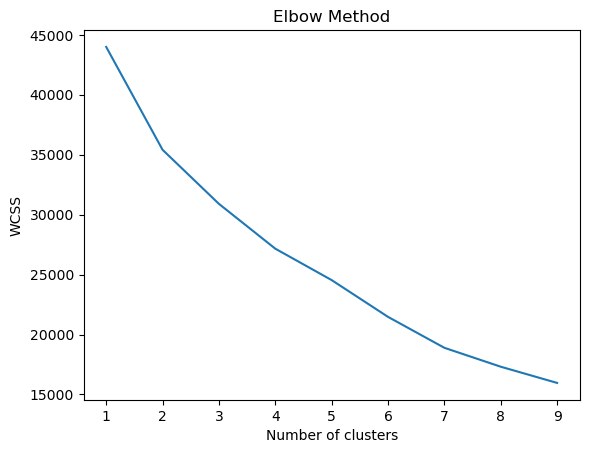

In [248]:
plt.plot(range(1, 10), wcss)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() # plotting the elbow point for number of cluster

In [249]:
clusters= KMeans(2, random_state=42)
clusters_labels=clusters.fit_predict(scaled_df) # traning the kmeans algorithm

In [250]:
silhouette_score(scaled_df,clusters_labels) #calculating the silhouette score

0.32542136327826215

In [251]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [252]:
df['clusterid'] = clusters.labels_

In [253]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [254]:
df[df['clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,84914,0,3,1,1,27482,25,0,0,6994,0,0
9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3989,91605,0,4,1,1,37840,18,0,0,1444,0,0
3996,72297,0,3,1,1,16241,16,0,0,1587,1,0
3997,58387,0,3,1,1,14581,39,0,0,1435,0,0


In [255]:
df[df['clusterid']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [256]:
# cluster id 0 has higher cc1miles,bonus_miles,bonus_trans,flight_miles_12mo,days_since_enroll

# DBSCAN

In [258]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # importing the libraries

In [266]:
data1=pd.read_csv(r'C:\Users\anike\Downloads\EastWestAirlines.csv') # reading the csv file

In [267]:
data1.rename(columns={'ID#':'ID','Award?':'Award'},inplace=True) # renaming the columns

In [268]:
data1.set_index('ID',inplace=True) # setting  id as index

In [269]:
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [271]:
stscaler = StandardScaler()
X = stscaler.fit_transform(data1) # applying the standard scaler

In [272]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [274]:
dbscan = DBSCAN(eps=2, min_samples=3)
dbscan.fit_predict(X) # traning the dbscan model

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [275]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [276]:
data1['clusterid']=dbscan.labels_
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [277]:
data1[data1['clusterid']==-1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
51,108137,0,1,1,1,6368,5,6368,5,6844,0,-1
66,53914,0,3,1,1,33767,45,5550,29,6826,1,-1
72,84409,5031,2,1,1,15436,16,1150,4,7766,0,-1
90,609477,0,3,1,1,21422,22,1200,8,6820,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,-1
3906,126167,0,5,1,1,190160,15,0,0,1612,1,-1
3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1


In [278]:
data1[data1['clusterid']==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clusterid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
6,16420,0,1,1,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
4015,11181,0,1,1,1,929,12,0,0,1407,0,0
4016,3974,0,1,1,1,365,3,0,0,1397,0,0


In [279]:
#clusterid -1 has higher balance, Qual_miles, cc1_miles,bonus_miles,bonus_trans,flight_miles_12mo,flight_trans_12

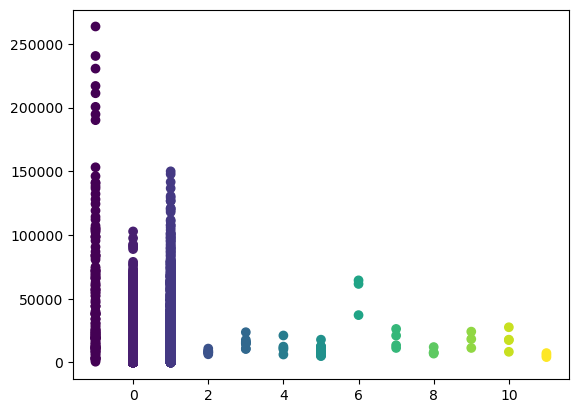

In [280]:
plt.scatter(data1['clusterid'],data1['Bonus_miles'],c=dbscan.labels_) # plotting the scatter plot for clusterid and bonus_miles column